In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de RS

In [2]:
gdf = gpd.read_file('Shapes/RS/43SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22728 entries, 0 to 22727
Data columns (total 14 columns):
ID            22728 non-null int64
CD_GEOCODI    22728 non-null object
TIPO          22728 non-null object
CD_GEOCODB    9548 non-null object
NM_BAIRRO     9548 non-null object
CD_GEOCODS    22728 non-null object
NM_SUBDIST    2859 non-null object
CD_GEOCODD    22728 non-null object
NM_DISTRIT    22728 non-null object
CD_GEOCODM    22728 non-null object
NM_MUNICIP    22728 non-null object
NM_MICRO      22728 non-null object
NM_MESO       22728 non-null object
geometry      22728 non-null object
dtypes: int64(1), object(13)
memory usage: 2.4+ MB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para RS

In [4]:
dados = pd.read_csv('Planilhas/RS/CSV/Basico_RS.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(22332, 11)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010
0,430003405000001,98.0,325.0,"3,32","3,25","670,61","2100704,78","952,46","2724192,37","358,21","835562,63"
1,430003405000002,120.0,389.0,"3,24","2,72","986,28","866732,59","1075,95","848892,73","595,08","1021339,6"
2,430003405000003,96.0,345.0,"3,59","3,57","798,16","405590,68","851,37","387123,29","436,79","309390,31"
3,430003415000002,246.0,667.0,"2,71","1,81","2319,51","19228321,39","2387,45","19630986,31","1297,58","9165040,59"
4,430003415000003,24.0,66.0,"2,75","2,28","1084,58","2267912,86","1446,11","2514789,87","1008,41","2226287,76"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
rs = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
rs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22332 entries, 0 to 22331
Data columns (total 24 columns):
ID            22332 non-null int64
CD_GEOCODI    22332 non-null int64
TIPO          22332 non-null object
CD_GEOCODB    9423 non-null object
NM_BAIRRO     9423 non-null object
CD_GEOCODS    22332 non-null object
NM_SUBDIST    2821 non-null object
CD_GEOCODD    22332 non-null object
NM_DISTRIT    22332 non-null object
CD_GEOCODM    22332 non-null object
NM_MUNICIP    22332 non-null object
NM_MICRO      22332 non-null object
NM_MESO       22332 non-null object
geometry      22332 non-null object
V001          22267 non-null float64
V002          22267 non-null float64
V003          22267 non-null object
V004          22267 non-null object
V005          22267 non-null object
V006          22267 non-null object
V007          22253 non-null object
V008          22253 non-null object
V009          22332 non-null object
V010          22332 non-null object
dtypes: float64(2), in

In [10]:
del gdf
del dados

Text(0.5,1,'SANTA CATARINA - SC')

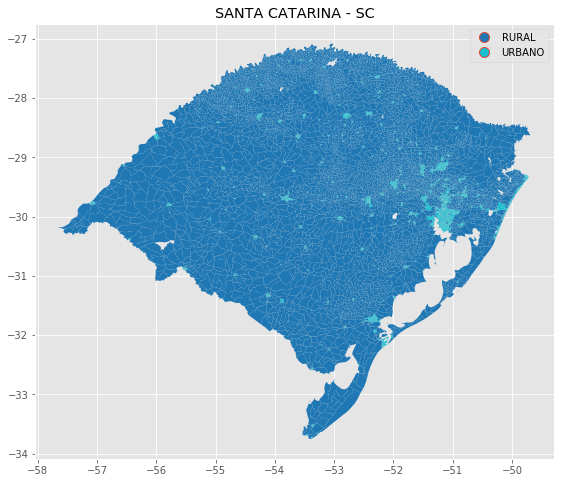

In [11]:
plt.style.use('ggplot')
rs.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('SANTA CATARINA - SC')

# Utilizando a projeção de Albers para calcular as áreas

In [12]:
rs['AREA'] = rs.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [13]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [14]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [15]:
areas_urbanas_rs_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='RS']
del areas_urbanas_br_15

In [16]:
areas_urbanas_rs_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
47,Benjamin Constant do Sul,RS,0.257,4302055.0,POLYGON ((-52.60438117283753 -27.5085900345154...,0.256778
464,Porto Vera Cruz,RS,0.421,4315073.0,POLYGON ((-54.90274916883766 -27.7336184098800...,0.420609
504,SÃ£o Paulo das MissÃµes,RS,1.899,4319307.0,(POLYGON ((-54.93207210740668 -28.017884490104...,1.899441
1243,AceguÃ¡,RS,1.005,4300034.0,POLYGON ((-54.1725085759386 -31.86179073051481...,1.004647
1244,Ãgua Santa,RS,1.980,4300059.0,(POLYGON ((-52.0732370492541 -28.2180864915754...,1.980421


In [17]:
areas_urbanas_rs_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_rs_15['CD_GEOCODM']=areas_urbanas_rs_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_rs_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 496 entries, 47 to 1749
Data columns (total 6 columns):
Municipio     496 non-null object
UF            496 non-null object
Area_Urb      496 non-null float64
CD_GEOCODM    496 non-null int64
geometry      496 non-null object
Area          496 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 27.1+ KB


In [18]:
rs.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

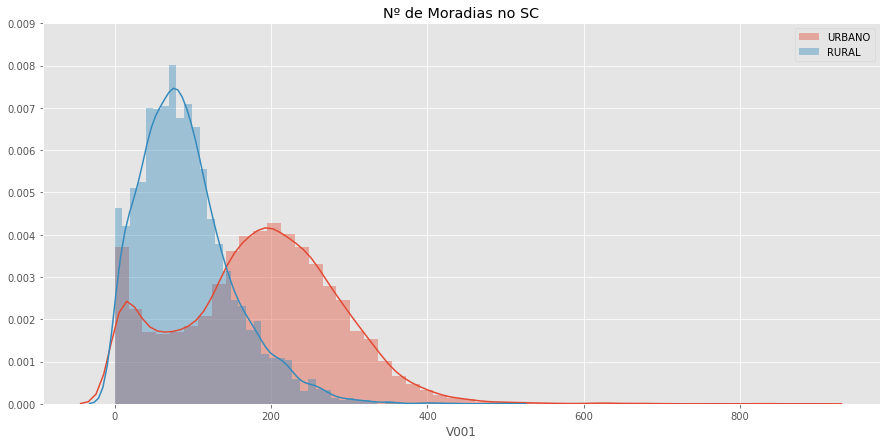

In [19]:
plt.style.use('ggplot')
rs['V001'] = pd.to_numeric(rs['V001'])
rs['V002'] = pd.to_numeric(rs['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(rs[rs['TIPO'] =='URBANO']['V001'])
sns.distplot(rs[rs['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.009))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [20]:
print('RURAL','\n',rs[rs['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',rs[rs['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    5622.000000
mean       91.649591
std        59.868999
min         0.000000
25%        49.000000
50%        83.000000
75%       123.000000
max       494.000000
Name: V001, dtype: float64
URBANO 
 count    16710.000000
mean       184.848474
std        101.417425
min          0.000000
25%        117.000000
50%        190.000000
75%        253.000000
max        886.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Area no SC- Rural e URBANO Embrapa')

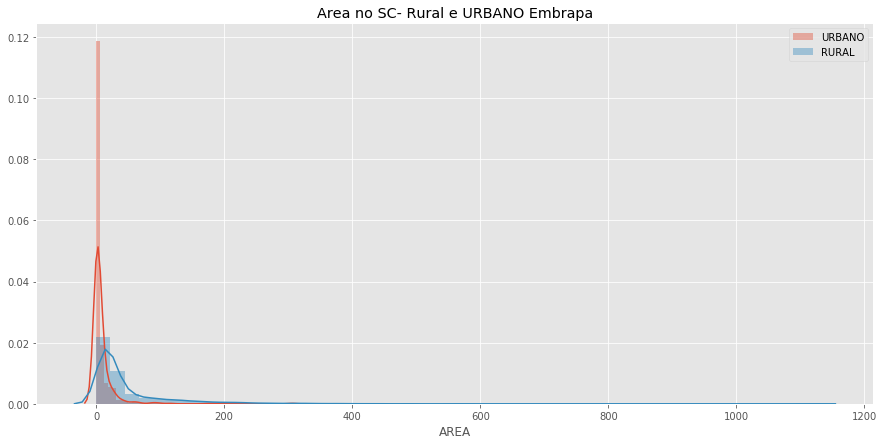

In [21]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_rs_15['Area'])
plt.legend(['URBANO'])
sns.distplot(rs[rs['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')

## Descrição da área por setor censitários urbanos e rurais

In [22]:
print('URBANO','\n',areas_urbanas_rs_15['Area'].describe())
print('RURAL','\n',rs[rs['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    496.000000
mean       8.340172
std       20.632147
min        0.256778
25%        1.210609
50%        2.151245
75%        7.284205
max      306.358356
Name: Area, dtype: float64
RURAL 
 count    5622.000000
mean       46.266057
std        63.226482
min         0.009909
25%        12.509894
50%        23.076435
75%        49.572003
max      1121.071672
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0027)

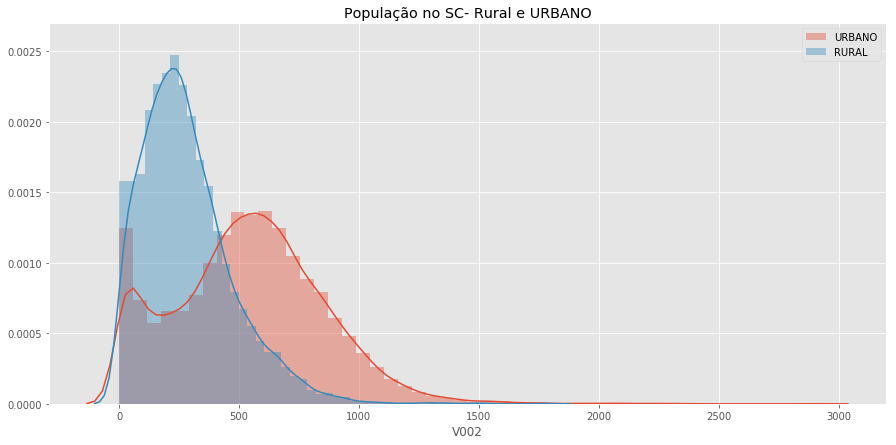

In [23]:
fig = plt.figure(figsize = (15,7))

sns.distplot(rs[rs['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(rs[rs['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.0027))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [24]:
print('RURAL','\n',rs[rs['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',rs[rs['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    5622.000000
mean      281.591604
std       190.430593
min         0.000000
25%       145.000000
50%       250.000000
75%       380.000000
max      1781.000000
Name: V002, dtype: float64
URBANO 
 count    16710.000000
mean       539.294195
std        311.521935
min          0.000000
25%        325.000000
50%        541.000000
75%        737.000000
max       2905.000000
Name: V002, dtype: float64


In [37]:
rs['Densidade Moradias'] = rs.V001/rs.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

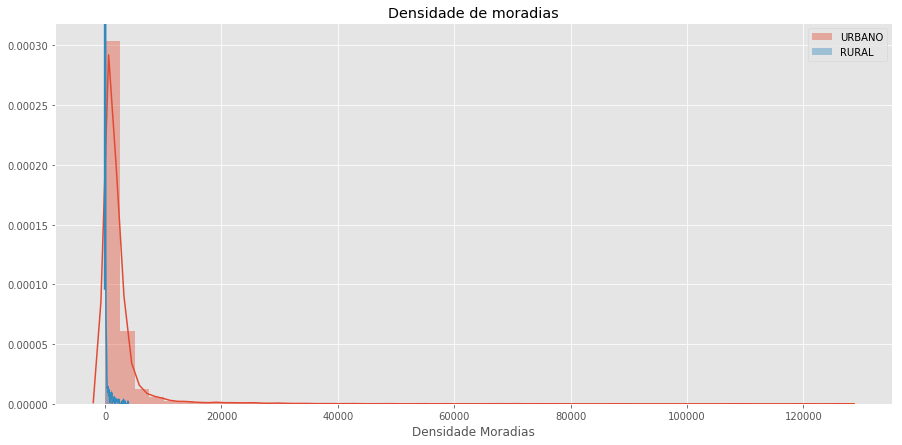

In [38]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(rs[rs['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(rs[rs['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [39]:
print('RURAL','\n',rs[rs['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',rs[rs['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    5622.000000
mean       22.980875
std       167.925987
min         0.000000
25%         1.459037
50%         3.774621
75%         6.583099
max      3912.511390
Name: Densidade Moradias, dtype: float64
URBANO 
 count     16710.000000
mean       2224.218175
std        4743.929290
min           0.000000
25%         358.922371
50%        1209.498704
75%        2407.418747
max      126707.988732
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [41]:
max_area = areas_urbanas_rs_15['AREA'].mean() 
min_pop =  rs[rs['TIPO']=='URBANO']['V002'].mean()
min_mor =  rs[rs['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = rs[rs['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [42]:
scrcu = rs[(rs.TIPO=='RURAL')&(rs.V001 >= min_mor)&(rs.AREA <= max_area)&(rs.V002>= min_pop)&(rs['Densidade Moradias']>= min_densidade_moradias)]

In [43]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000
mean,26343.720000,4.305735e+14,255.280000,843.280000,0.219629,1727.823587
std,5338.748289,5.524960e+11,63.157554,226.537436,0.147324,1022.405778
min,22652.000000,4.301602e+14,189.000000,593.000000,0.058967,526.818324
25%,22659.000000,4.301602e+14,204.000000,687.000000,0.096223,750.553235
50%,24417.000000,4.304358e+14,232.000000,766.000000,0.161456,1491.766801
75%,26871.000000,4.306007e+14,299.000000,953.000000,0.363972,2381.908315
max,40015.000000,4.318507e+14,435.000000,1492.000000,0.503020,3912.511390


Text(0.5,1,'SCRCU - Por Município')

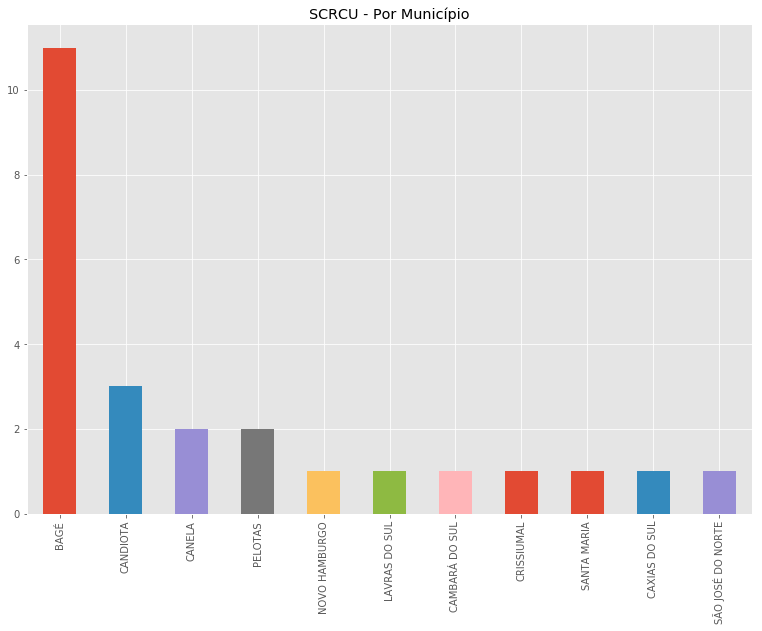

In [44]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de RS - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


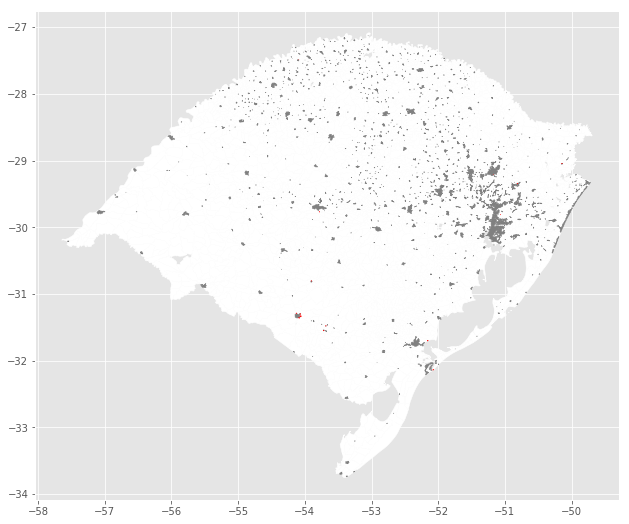

In [45]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
rs.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_rs_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [30]:
areas_urbanas_rs_15.rename(columns={'Area':'AREA'},inplace = True)

In [31]:
fonte = np.zeros(areas_urbanas_rs_15.shape[0])
areas_urbanas_rs_15['FONTE'] = fonte

In [32]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
regioes_urbanas_rs = scrcu[['geometry','FONTE']].append(areas_urbanas_rs_15[['geometry','FONTE']])

In [34]:
regioes_urbanas_rs.head()

,geometry,FONTE
1173,POLYGON ((-54.06162446177979 -31.3275557696489...,1.0
1174,"POLYGON ((-54.0541215564858 -31.329364817297, ...",1.0
1175,POLYGON ((-54.06162446177979 -31.3275557696489...,1.0
1176,"POLYGON ((-54.0628139105304 -31.3322638695978,...",1.0
1177,POLYGON ((-54.06312738323619 -31.3363650015964...,1.0


In [35]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_rs['FONTE'] = regioes_urbanas_rs['FONTE'].apply(fonte) 

In [36]:
regioes_urbanas_rs.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_rs.shp')

In [46]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_rs[regioes_urbanas_rs['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_rs[regioes_urbanas_rs['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_rs.crs)